----------------------------
#### Loss Functions When Training Deep Learning Neural Networks
-----------------------------

- Deep learning neural networks are trained using the __stochastic gradient descent__ optimization algorithm.

- As part of the `optimization` algorithm, the __error__ (`loss/cost` function) for the current state of the model must be estimated `repeatedly`. (every epoch)

- This requires the choice of an __error__ function, conventionally called a __loss__ function, that can be used to estimate the __loss of the model__ so that the weights can be updated to reduce the loss on the next evaluation.

- Neural network models learn a mapping from inputs (X) to outputs (y) from examples and the choice of __loss function__ must match the framing of the specific predictive modeling problem, 
    - such as __classification__ or __regression__. 


- `Regression Loss Functions`

    - `Mean Squared Error` Loss (mse)
    - Mean Squared Logarithmic Error Loss
    - `Mean Absolute Error` Loss (mae)
        
- `Binary Classification` Loss Functions

    - `Binary Cross-Entropy`
    - Hinge Loss/ Squared Hinge Loss
    
- `Multi-Class Classification` Loss Functions

    - `Multi-Class Cross-Entropy` Loss
    - Sparse Multiclass Cross-Entropy Loss
    - `Kullback Leibler Divergence` Loss

--------------------------
#### Regression Loss Functions
-----------------------------

#### 1. Mean Squared Error Loss

The __Mean Squared Error__, or __MSE__, loss is the __default loss__ to use for regression problems.

- the __preferred loss function__ 
- It is the loss function to be evaluated first and only changed if you have a good reason.

- Mean squared error is calculated as the __average of the squared differences__ between the __predicted__ and __actual__ values. - The result is __always positive__ regardless of the sign of the predicted and actual values and a perfect value is 0.0. 
- The squaring means that __larger mistakes result in more error__ than smaller mistakes, meaning that the model is punished for making larger mistakes.

- The mean squared error loss function can be used in Keras by specifying __‘mse‘__ or __‘mean_squared_error‘__ as the loss function when compiling the model.

In [1]:
# mlp for regression with mse loss function
from sklearn.datasets import make_regression

from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense

from keras.optimizers import SGD

from matplotlib import pyplot

In [5]:
# generate regression dataset
X, y = make_regression(n_samples=1000, 
                       n_features=4, 
                       noise=0.1, # standard deviation of the gaussian noise applied to the output.
                       random_state=1)

In [6]:
X[:5]

array([[ 1.15526176,  0.34605775,  0.09611414,  0.15205234],
       [-0.66385739, -1.25602582, -0.62663497,  0.99419774],
       [ 0.76729363, -1.48065462,  0.75037481, -0.08259524],
       [ 1.20845633,  1.1157018 ,  0.01716473, -0.42914228],
       [-0.35902061, -2.48489541, -1.21437336, -0.34350003]])

In [7]:
# standardize dataset
X = StandardScaler().fit_transform(X)
#y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]

In [9]:
# split into train and test
n_train = 800

trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [10]:
# define model
model = Sequential()

model.add(Dense(units=25, input_dim=4, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(units=1,               activation='linear'))

opt = SGD(lr=0.01, momentum=0.9)

model.compile(loss='mean_squared_error', optimizer='Adam')

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                125       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [13]:
# fit model
history = model.fit(trainX, 
                    trainy, 
                    validation_data=(testX, testy), 
                    epochs=100, verbose=0)

In [15]:
# history.history

In [16]:
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse  = model.evaluate(testX,  testy,  verbose=0)

In [17]:
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 352.193, Test: 253.321


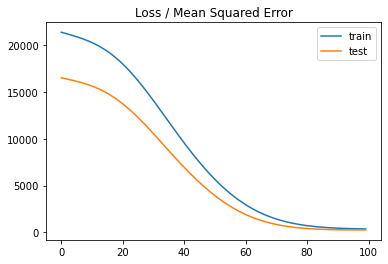

In [20]:
# plot loss during training
pyplot.title('Loss / Mean Squared Error')

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')

pyplot.legend();

#### 2. Mean Squared Logarithmic Error Loss

- when the target value has a __spread of values__ and when predicting a large value, you may not want to punish a model as heavily as mean squared error.

- Instead, we can first calculate the __natural logarithm of each of the predicted values__, then calculate the mean squared error. This is called the __Mean Squared Logarithmic Error loss__, or __MSLE__ for short.

It has the effect of relaxing the punishing effect of large differences in large predicted values.

> As a loss measure, it may be more appropriate when the model is predicting __unscaled__ quantities directly. Nevertheless, we can demonstrate this loss function using our simple regression problem.

The model can be updated to use the __‘mean_squared_logarithmic_error‘__ loss function 

In [14]:
# mlp for regression with msle loss function
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot

In [15]:
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

In [16]:
# standardize dataset
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]

In [17]:
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [18]:
# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_squared_logarithmic_error', optimizer=opt, metrics=['mse'])

In [19]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

Train: 0.128, Test: 0.170


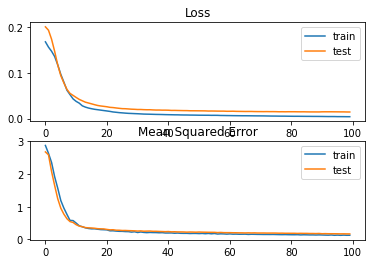

In [20]:
# evaluate the model
_, train_mse = model.evaluate(trainX, trainy, verbose=0)
_, test_mse  = model.evaluate(testX, testy, verbose=0)

print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot mse during training
pyplot.subplot(212)
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['mse'], label='train')
pyplot.plot(history.history['val_mse'], label='test')
pyplot.legend();

#### 2. Mean Absolute Error Loss
On some regression problems, the distribution of the target variable may be __mostly Gaussian__, but __may have outliers__, e.g. large or small values far from the mean value.

The __Mean Absolute Error__, or __MAE__, __loss__ is an appropriate loss function in this case as it is __more robust__ to outliers. 

It is calculated as the __average of the absolute difference__ between the actual and predicted values.

The model can be updated to use the __‘mean_absolute_error‘__ loss function and keep the same configuration for the output layer.

In [21]:
# mlp for regression with msle loss function
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot

In [22]:
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=4, noise=0.1, random_state=1)

In [23]:
# standardize dataset
X = StandardScaler().fit_transform(X)
#y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]

In [24]:
# split into train and test
n_train = 800
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [26]:
# define model
model = Sequential()
model.add(Dense(25, input_dim=4, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mae'])

In [27]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

Train: 2.496, Test: 2.311


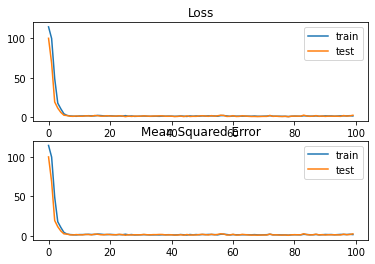

In [28]:
# evaluate the model
_, train_mse = model.evaluate(trainX, trainy, verbose=0)
_, test_mse  = model.evaluate(testX, testy, verbose=0)

print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot mse during training
pyplot.subplot(212)
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['mae'], label='train')
pyplot.plot(history.history['val_mae'], label='test')
pyplot.legend();

------------------------------
#### Binary Classification Loss Functions
------------------------------------------
- `Binary` classification are those predictive modeling problems where examples are assigned `one of two labels`.

- The problem is often framed as predicting a value of 0 or 1 for the first or second class and is often implemented as predicting the probability of the example belonging to class value 1.

- We will generate examples from the circles test problem in scikit-learn as the basis for this investigation. 

- The circles problem involves samples drawn from two concentric circles on a two-dimensional plane, where points on the outer circle belong to class 0 and points for the inner circle belong to class 1. 

- Statistical noise is added to the samples to add ambiguity and make the problem more challenging to learn.

- We will generate 1,000 examples and add 10% statistical noise. 

#### 1. Multi-Class Cross-Entropy Loss

In [1]:
# mlp for the blobs multi-class classification problem with cross-entropy loss
from sklearn.datasets import make_blobs

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD

from keras.utils import to_categorical

from matplotlib import pyplot
from numpy import where

In [2]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=4, random_state=2)

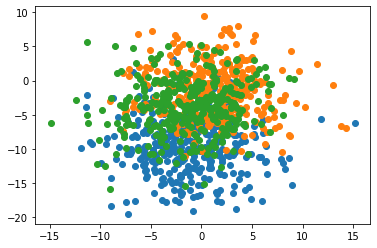

In [3]:
# select indices of points with each class label
for i in range(3):
	samples_ix = where(y == i)
	pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1])

In [4]:
y[:10]

array([2, 2, 2, 0, 1, 0, 1, 1, 2, 2])

In [5]:
# one hot encode output variable
y = to_categorical(y)

In [6]:
y

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

... explaination on to_categorical ...

In [7]:
class_vector =[2, 5, 6, 1, 4, 2, 3, 2] 

In [9]:
to_categorical(class_vector, num_classes = 7, dtype ="int32") 

array([[0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0]])

... back to the code ...

In [10]:
# split into train and test
n_train = 800
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train],    y[n_train:]

In [11]:
# define model
model = Sequential()
model.add(Dense(units=50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(units= 3,              activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                150       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 153       
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


In [13]:
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [14]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

Train: 0.615, Test: 0.665


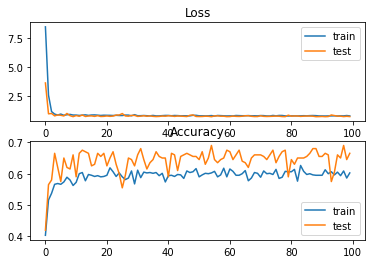

In [15]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend();

#### 2.  Sparse Multiclass Cross-Entropy Loss

- A possible cause of frustration when using __cross-entropy__ with classification problems with a large number of labels is the __one hot encoding__ process.

For example, 

    - predicting words in a vocabulary may have tens or hundreds of thousands of categories, one for each label. 
    - This can mean that the target element of each training example may require a one hot encoded vector with tens or hundreds of thousands of zero values, requiring significant memory.

- Sparse cross-entropy addresses this by performing the same cross-entropy calculation of error, `without requiring that the target variable be one hot encoded prior to training`.

- Sparse cross-entropy can be used in keras for multi-class classification by using __‘sparse_categorical_crossentropy‘__ when calling the compile() function.

In [67]:
# mlp for the blobs multi-class classification problem with sparse cross-entropy loss
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot

In [68]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

In [69]:
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [70]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

In [71]:
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [72]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

Train: 0.828, Test: 0.824


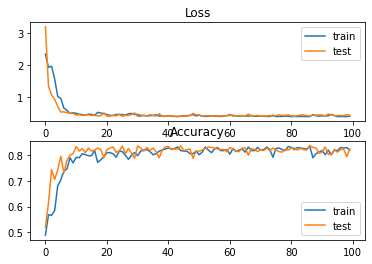

In [73]:

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()